In [66]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from sklearn.metrics import classification_report ,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
RANDOM_SEED=42
Labels=['Safe','Fraud']
import warnings
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv('creditcard.csv')

In [68]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [70]:
cclass=pd.value_counts(df['Class'],sort=True)

Text(0, 0.5, 'Frequency')

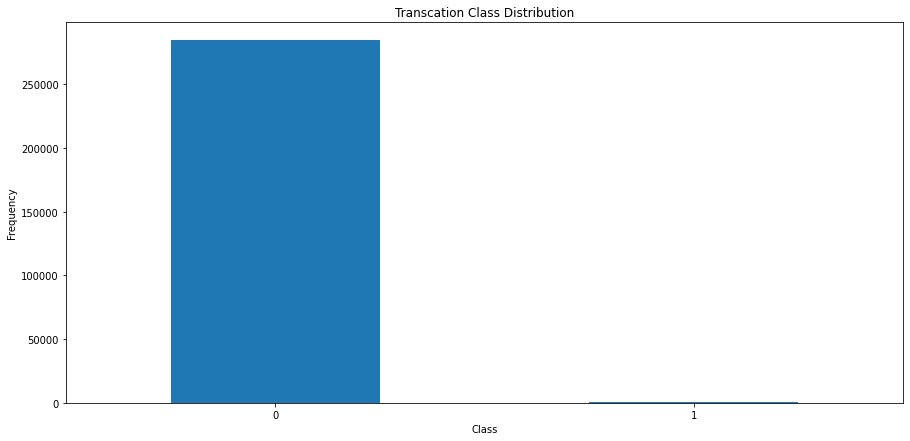

In [71]:
plt.figure(1,figsize=(15,7))
cclass.plot(kind='bar',rot=0)


plt.title("Transcation Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

<Figure size 1080x720 with 0 Axes>

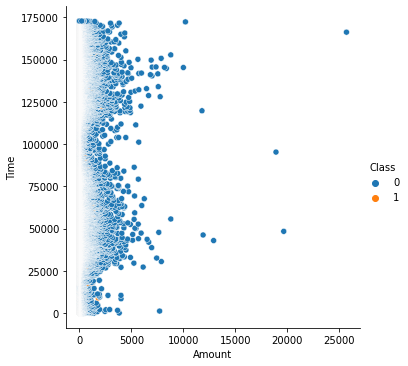

In [72]:
plt.figure(2,figsize=(15,10))
sn.relplot(x='Amount',y='Time',hue='Class',data=df)

In [73]:
fraud=df[df['Class']==1]
safe=df[df['Class']==0]

In [74]:
print(len(fraud))
print(len(safe))
print(fraud.shape)
print(safe.shape)

492
284315
(492, 31)
(284315, 31)


In [75]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [76]:
safe.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<Figure size 1440x1080 with 0 Axes>

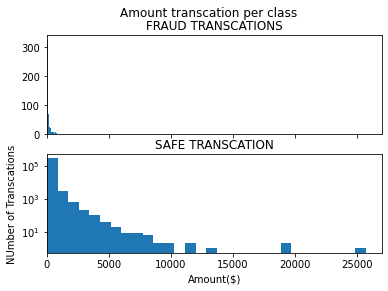

In [77]:
plt.figure(2,figsize=(20,15))
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount transcation per class')
ax1.hist(fraud.Amount,bins=25)
ax1.set_title('FRAUD TRANSCATIONS')
ax2.hist(safe.Amount,bins=30)
ax2.set_title('SAFE TRANSCATION')
plt.xlabel('Amount($)')
plt.ylabel('NUmber of Transcations')
plt.xlim((0,27000))
plt.yscale('log')
plt.show()

In [78]:
df1=df.sample(frac=0.1,random_state=1)
df1.shape

(28481, 31)

In [79]:
fraud=df1[df1['Class']==1]
safe=df1[df1['Class']==0]
outlier=len(fraud)/(len(safe))

In [80]:
print(outlier)

0.0017234102419808666


In [81]:
print("fraud cases : {}".format(len(fraud)))

print("safe cases : {}".format(len(safe)))

fraud cases : 49
safe cases : 28432


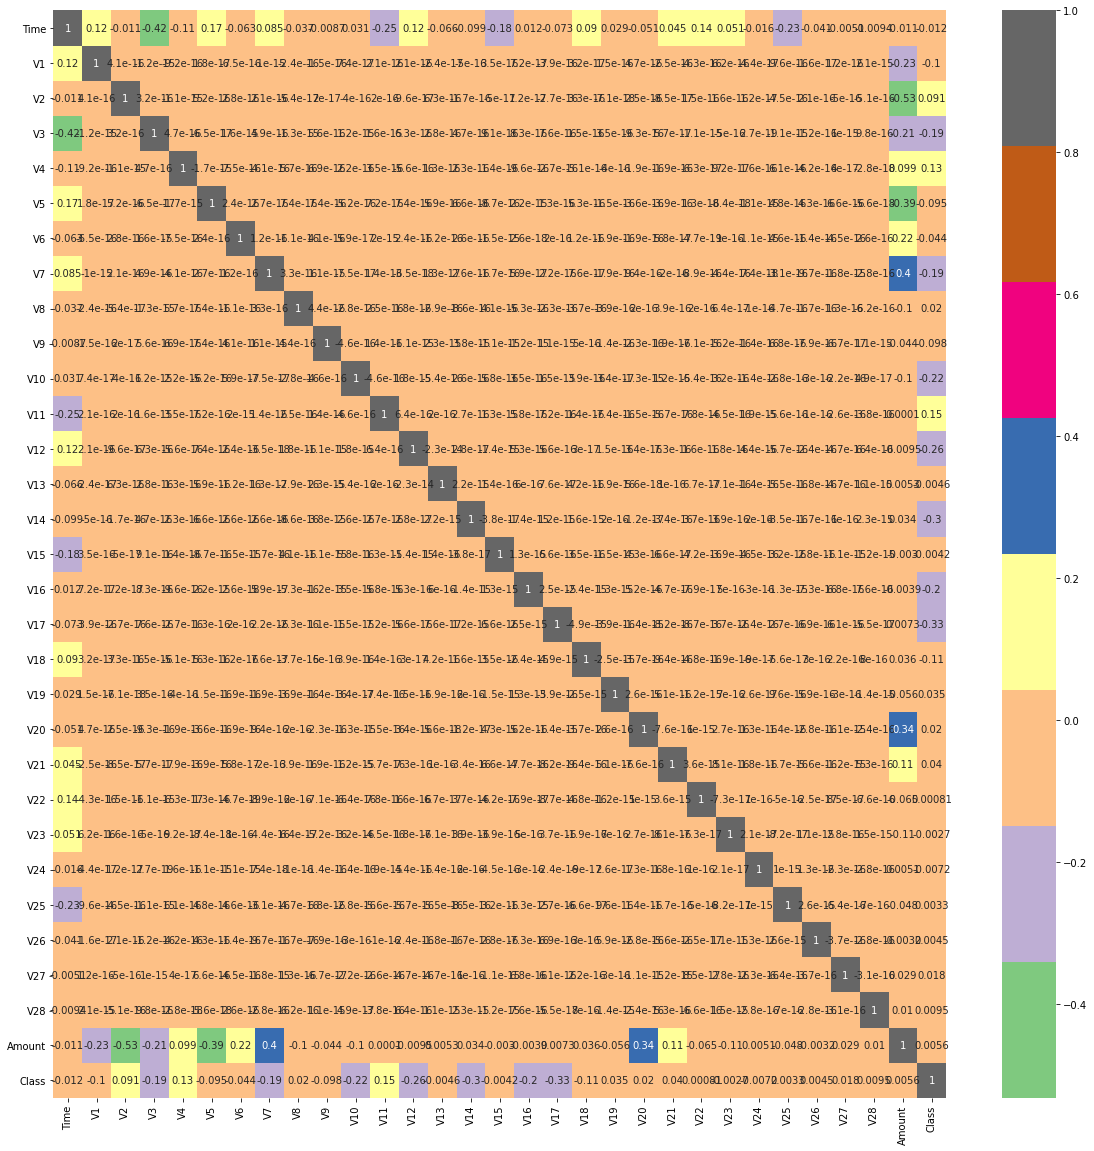

In [82]:
corrdata=df1.corr()
top_corr_features=corrdata.index
plt.figure(figsize=(20,20))
ax=sn.heatmap(df[top_corr_features].corr(),annot=True,cmap="Accent")

In [83]:
y=df1['Class']
x=df1.drop('Class',axis='columns')

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [85]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [86]:
y_pred=np.array(model.predict(x_test))
y=np.array(y_test)

In [87]:
print(confusion_matrix(y_test,y_pred))

[[8522    9]
 [   5    9]]


In [88]:
print(accuracy_score(y,y_pred))
print(model.score(x_train,y_train))

0.9983616149795201
0.9988463081861958


In [89]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8531
           1       0.50      0.64      0.56        14

    accuracy                           1.00      8545
   macro avg       0.75      0.82      0.78      8545
weighted avg       1.00      1.00      1.00      8545



In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_Pred1= rfc.predict(x_test)

In [91]:
print(accuracy_score(y,y_Pred1))
print(rfc.score(x_train,y_train))
print(classification_report(y,y_Pred1))

0.9989467524868344
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8531
           1       0.69      0.64      0.67        14

    accuracy                           1.00      8545
   macro avg       0.85      0.82      0.83      8545
weighted avg       1.00      1.00      1.00      8545



In [92]:
import pickle

In [93]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [94]:
filename = 'finalized_model2'
pickle.dump(model, open(filename, 'wb'))